# STA130 Homework 06


### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

Simple Linear Regression describe the relationship between a predictor x and an response variable Y, and Y is a linear function depend on x. 


The model of Simple Linear Regression is Y = ^beta_0 + ^beta_1 x + e

^beta_0: intercept
^beta_1: slope
e: random error
x: independent variable(predictor)
Y: dependent variable(response variable)

In [22]:
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

n = 50                 
beta0 = 2.0           
beta1 = 0.5            
sigma = 1.0           

x = np.linspace(0, 10, n)
errors = norm.rvs(loc=0, scale=sigma, size=n)

Y = beta0 + beta1 * x + errors

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Line'))
fig.update_layout(title='Simple Linear Regression Model: Y vs. x', xaxis_title='x', yaxis_title='Y')
fig.show()

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

In [23]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  # To fit statistical models, including OLS regression.
import plotly.express as px  # library for data visualization.

n = 50
beta0 = 2.0
beta1 = 0.5
sigma = 1.0
x = np.linspace(0, 10, n)
errors = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'Y': Y})

model_data_specification = smf.ols("Y ~ x", data=df)  # Shows that Y is predicted as a linear function of x
fitted_model = model_data_specification.fit()  # Fits the model to the data

# Model summary and results
fitted_model.summary()  # Provides a detailed summary of the fitted model, including coefficients, R-squared, etc.
fitted_model.summary().tables[1]  # Displays the main table with coefficients, standard errors, and t-values.
fitted_model.params  # Shows the fitted parameters (intercept and slope)
fitted_model.params.values  # Outputs the fitted parameter values as a numpy array
fitted_model.rsquared  # Provides the R-squared value, indicating the model's goodness of fit

# Visualization
df['Data'] = 'Data'  # Adds a column
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')  # Adds data points and fitted trendline to the plot

# Equivalent manual trendline plotting (alternative to trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Line'))

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS





### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

To compare the two lines, I can see the impact of random sampling variation on the fitted model and observed data. The true line displays the true relationship we tried to simulate, but the fitted line shows the estimated relationship. This difference shows the impact of random sampling in data, also explain why the estimated models might different from the true model.

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)

We can obtain a table when run fitted_model.summary().tables[1], the table provides the estimated slope and intercept. Using those estimated parameters, fitted_model.fittedvalues can be calculated by the formula ^y= ^B0+^B1Xi based on each value Xi.


### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>
    
The OLS method choose the line which can minimize the total squared differences between the predicted value ^Yi and observed value Yi. Those different can be calculated by e= Yi-^Yi. As the formula e= Yi-^Yi might have negative result, negative and positive result might cancel each other. Using the 'Squares', can ensure each value is positive and reduce misleading measure.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` is equivalent to the formula R**2=1- (sum(Yi-^Yi)**2/sum(Yi-mean(Y))**2). (sum(Yi-^Yi)**2) is the sum of squared residuals, (sum(Yi-mean(Y))**2) is the total sum of squares. The SSR will be zero if the model fit perfectly and R**2=1. If the model is not fit perfectly, (sum(Yi-^Yi)**2) will equal to (sum(Yi-mean(Y))**2), and R**2=0. Therefore, this expression can be interpreted as the proportion of variation in Y.
2. `fitted_model.rsquared` give the R-squared value culated by the R**2=1- (sum(Yi-^Yi)**2/sum(Yi-mean(Y))**2). R-squared usually can be explain as the measure of model accuracy. If the value of R-squared is high,it means the model fits better.
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2` calculate the square of the correlation between the Y and ^Y. In simple linear regression the square of the correlation is equivalent to R-square, as the correlation between the Y and ^Y measure the strength of linear realtionship. 
4. `np.corrcoef(Y,x)[0,1]**2` calculate the square of the correlation between the Y and X. In simple linear regression, the square of the correlation between the Y and X is equal to R-square. As the correlation between the Y and X captures the linear relationship between Y and X.

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Hint: What even ARE the assumptions of the  **Simple Linear Regression** model, you ask? Have a look at the mathematical specification and see if what it seems to be assuming._
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

In [14]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The linearity assumption assumes a linear relationship between the outcome variable(crop yield) and predictor(amount of fertilizer). However, the crop yield does not increase when the amount of fertilizer is increase. Therefore, the scatter plot shows a curve, which violates the linearity assumption.

## "Week of Nov04" HW [due prior to the Nov08 TUT]

_**In place of the "Data Analysis Assignment" format we introduced for the previous weeks' HW, the remaining questions will be a collection of exercises based around the following data**_

> The details of the "LOWESS Trendline" shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here


In [15]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

The null hypothesis of no linear association(on average) can be write as Ho: B1=0. B1 is the slope of regression line, so B1=0 means there is no linear relationship between duration and waiting time. In this data, the OLS result shows the p=value for the 'waiting' variable is close to 0, which show strong evidence reject H0. To reject the null hypothesis, also shows that there is a significant linear association between duration and waiting time.

In [16]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:09:52   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


To find the relationship between duration and wait time, I need to run short_wait_limit(62, 64, and 66), and determine is there is evidence against the null hypothesis through p-value. The null hypothesis is: H0: B1 = 0. B1 is the slope of the regression line. If H0 is true, there would be no linear relationship between waiting time and  duration.


short_wait_limit = 62
If the p-value is > 0.1, it means no significant evidence that shows linear relationship within the 62 minutes wait time. Also, the relationship between duration and waiting time are different as in the full data set.

short_wait_limit = 64
If the p-value remains high, although the wait threshold increase, still no strong evidence of a linear relationship between waiting time and duration within 63 minutes.

short_wait_limit = 66
If the p-value decreases to < 0.05, which means that we have evidence against the null hypothesis. The linear relationship between waiting time and duration within this range of short waits might exists.

In [17]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops to repeatedly create fitted **Simple Linear Regression** models using different samples, collecting the **fitted slope coeffient** created in each `for` loop "step" in order to visualize the **simulated sampling distributions**_
> 
> - _A **bootstrapped sample** of the "long wait times" dataset can be created with `old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)`_
>
>
> - _A **simulated** version of the "long wait times under a null hypothesis assumption of **no linear association (on average)**" dataset can be created by first creating `old_faithful_simulation = old_faithful[long_wait].copy()` and then assigning the **simulated** it values with `old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())`_ 
>
>  _The values $\beta_0 = 1.65$ and $\sigma = 0.37$ are chosen to match what is actually observed in the data, while $\beta_1 = 0$ is chosen to reflect a **null hypothesis** assumption of "no linear assocaition (on average)"; and, make sure that you understand why it is that_
>
>
> - _if `bootstrapped_slope_coefficients` is the `np.array` of your **bootstrapped slope coefficients** then `np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])` is a 95\% **bootstrapped confidence interval**_
> 
>
> - _if `simulated_slope_coefficients` is the `np.array` of your **fitted slope coefficients** **simulated** under a **null hypothesis** "no linear association (on average)" then `(np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean()` is the **p-value** for the **simulated** **simulated sampling distribution of the slope coeficients** under a **null hypothesis** "no linear association (on average)"_

</details>
<br>

In [18]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


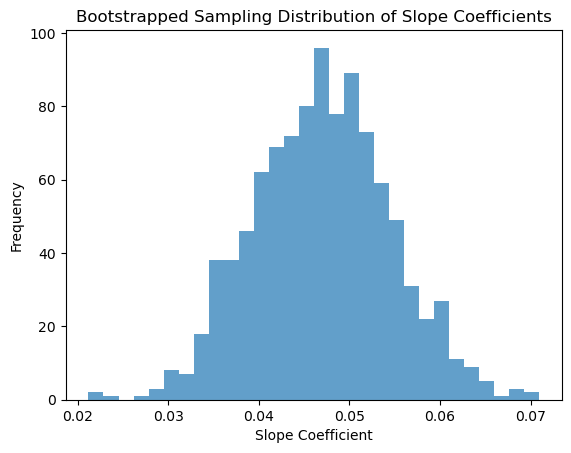

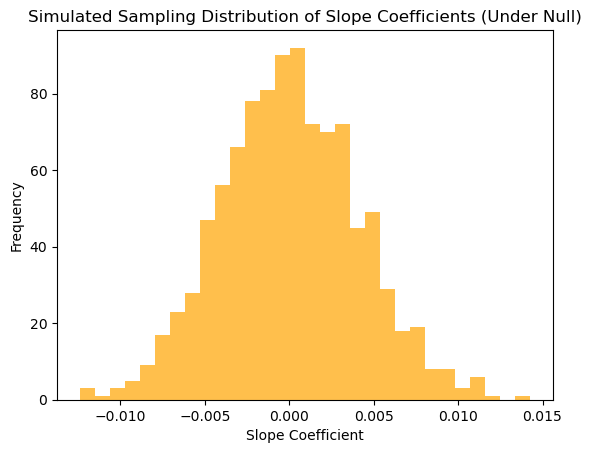

95% Bootstrapped Confidence Interval for Slope: [0.03297222 0.06143467]
Simulated p-value: 0.0


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

old_faithful = sns.load_dataset('geyser')
long_wait = old_faithful['waiting'] > 63

bootstrapped_slope_coefficients = []
for _ in range(1000):
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(bootstrap_model.params['waiting'])

plt.hist(bootstrapped_slope_coefficients, bins=30, alpha=0.7)
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.show()

beta_0 = 1.65
beta_1 = 0
sigma = 0.37

simulated_slope_coefficients = []
for _ in range(1000):
    old_faithful_simulation = old_faithful[long_wait].copy()
    old_faithful_simulation['duration'] = beta_0 + beta_1 * old_faithful_simulation['waiting'] \
                                          + stats.norm(loc=0, scale=sigma).rvs(size=long_wait.sum())
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params['waiting'])

plt.hist(simulated_slope_coefficients, bins=30, alpha=0.7, color='orange')
plt.title("Simulated Sampling Distribution of Slope Coefficients (Under Null)")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.show()

bootstrapped_confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope:", bootstrapped_confidence_interval)

observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']

simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value:", simulated_p_value)


### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>


In [21]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


smf.ols('duration ~ waiting', data=old_faithful):
Assumes a continuous linear relationship between waiting time and duration for the full dataset.

smf.ols('duration ~ waiting',data=old_faithful[short_wait]):
Assumes a continuous linear model but only for "short" wait times (<64 minutes).

smf.ols('duration ~ waiting', data=old_faithful[long_wait]):
Assumes a continuous linear model but applied only to "long" wait times (>71 minutes).

Big Picture Differences
Indicator variable model can compare the average durations by "short" and "long" wait times. This model is helpful when comparing two distinct groups. Other models assume a continuous, linear relationship for full data set (or specific subsets).

The null hypothesis for the indicator model is:
H0: Bcontrast = 0

This hypothesis means the average duration between "long" and "short" wait times is the same.

If the p-value is < 0.05, reject H0, means a significant difference in duration between the two categories. Long wait times are related with significant increase in duration.
If the p-value is > 0.1, fail to reject H0, means no strong evidence that showa a difference in average duration between long and short wait times.

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

> Hint: Question 5 of the *Communication Activity #2* of the Oct25 TUT (addressing an *omitted* section of the TUT) discusses how the assumption in *Simple Linear Regression* that the *error* terms $\epsilon_i \sim \mathcal N\left(0, \sigma\right)$ is diagnostically assessed by evaluating distributional shape of the *residuals* $\text{e}_i = \hat \epsilon_i = Y_i - \hat y_i$


In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model 4 histogram shows that it is reasonable to assume that the *error* term of each model is normally distributed.

Model 1: All Data using Slope
This model applies a single linear relationship for full dataset. If the histogram matches the normal distribution curve, it sopport the plausibility of the normality assumption. However, the data might display some deviations from normality across the full range.

Model 2: Short Wait Data
This model is only applies to short wait times. Short wait data might show non-normality, since it does not  capture the variability in the long wait times, which might lead to a skewed.

Model 3: Long Wait Data  
This model is only applies to long wait times. Since the restricting to long waits, lack of extreme values might causes normal residual.

Model 4: All Data using Indicator Variable
This model using an indicator variable rather than assuming a continuous relationship. Since this model separate short and long waits, it is more effective to address non-linear patterns. Comparing to a single linear model for all data, this model is more likely leading to a normal residual distribution.


### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different.<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops for repeated (shuffling simulation) **permutation** and (subgroup) **bootstrapping**, where_
>
> - _"shuffling" for **permutation testing** is done like this `old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)#.groupby('kind').size()`; then, the **mean difference statistic** is then calculated using `.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]` (so the **observed statistic** is `old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]`_
> 
>
> - _"two sample" **bootstrapping** is done like this `old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)#.groupby('kind').size()`; then, the **bootstrapped mean difference statistic** is then calculated using `.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]` (like the **observed statistic** except this is applied to the **bootstrapped** resampling of `old_faithful`)_
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_
</details>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = np.where(old_faithful['waiting'] >= 68, 'long', 'short')

observed_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Part (A): Permutation Test
permuted_diffs = []
n_permutations = 1000

for _ in range(n_permutations):
    shuffled = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1).values)
    permuted_diff = shuffled.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permuted_diffs.append(permuted_diff)

p_value = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()
print(f"Permutation Test p-value: {p_value}")

# Part (B): Bootstrap Confidence Interval
bootstrapped_mean_diffs = []
n_bootstraps = 1000

for _ in range(n_bootstraps):
    # Bootstrap sample within each group
    bootstrapped_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    # Calculate mean difference in bootstrap sample
    bootstrapped_diff = bootstrapped_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs.append(bootstrapped_diff)

# Calculate 95% bootstrap confidence interval
bootstrap_ci = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for Mean Difference: {bootstrap_ci}")


Permutation Test p-value: 0.0
95% Bootstrap Confidence Interval for Mean Difference: [2.09833502 2.29619059]


(a)
Permutation Test
Testing the difference in mean durations between long and short groups. Randomly pick short and long labels and calculate the mean difference in eruption duration between groups. If no difference between long and short groups exists, random picking should get similar mean differences. 

Bootstrap Confidence Interval
Creating a 95% confidence interval for the mean difference in durations between short and long groups.
Sample with replacement from each group and repeat multiple times, and calculating the mean difference for each sample.

(b)
Similarities
Both try to estimate the mean difference in duration between short and long groups.
Differences
The indicator model calculates a p-value from regression coefficients, while the permutation test uses random label to determine p-values.
The bootstrap uses empirical resampling for the interval, while the indicator model uses standard errors from the regression to derive confidence intervals.

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

Somewhat

chat summary:
---

### 1. **Simple Linear Regression Explanation**
   - **Question**: Explained the theoretical components of Simple Linear Regression, including predictor and outcome variables, slope, intercept, and error term. Provided Python code using `numpy` and `scipy.stats` to simulate data that follows this model.
   - **Response**: Described each component, demonstrated how each contributes to a sample drawn from a normal distribution, and offered code to visualize a simulated Simple Linear Regression model.

### 2. **Fitting a Simple Linear Regression Model with `statsmodels`**
   - **Question**: Explained how to fit a Simple Linear Regression model using a simulated dataset with `pandas` and `statsmodels`. 
   - **Response**: Provided code to create a DataFrame, fit the model, and visualize the fitted regression line. Discussed how the model parameters are derived and interpreted.

### 3. **Theoretical vs. Fitted Model Comparison**
   - **Question**: Added a deterministic (theoretical) line to the plot for comparison with the fitted line, discussing random sampling variation.
   - **Response**: Provided code to overlay the deterministic line with the fitted line and explained how random sampling variation affects observed data, resulting in differences between theoretical and fitted models.

### 4. **Deriving Fitted Values Using Estimated Parameters**
   - **Question**: Explained how `fitted_model.fittedvalues` are derived based on `fitted_model.params` in Simple Linear Regression.
   - **Response**: Illustrated how fitted values (\( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \)) are computed from the estimated intercept and slope parameters.

### 5. **Ordinary Least Squares (OLS) Method**
   - **Question**: Explained how the OLS method chooses the line that minimizes the sum of squared residuals.
   - **Response**: Discussed why OLS uses squared residuals to account for both positive and negative differences and to emphasize larger deviations.

### 6. **R-squared Interpretation**
   - **Question**: Explained why `R^2` is interpreted as the proportion of variation in \( Y \) explained by the model and how different calculations of `R^2` are equivalent in Simple Linear Regression.
   - **Response**: Explained each expression for calculating `R^2`, emphasizing the similarity between squared correlation and the ratio of variances.

### 7. **Assumptions Compatibility with Example Data**
   - **Question**: Identified Simple Linear Regression assumptions that may not be compatible with given example data.
   - **Response**: Noted that linearity and homoscedasticity assumptions might not hold if data shows a nonlinear pattern or variable residual spread.

### 8. **Null Hypothesis of No Linear Association**
   - **Question**: Formulated a null hypothesis for testing the slope and interpreted the p-value for testing a linear association in the Old Faithful dataset.
   - **Response**: Explained that a low p-value suggests evidence against the null hypothesis of no linear association, indicating a significant relationship between waiting time and duration.

### 9. **Evidence for Relationship in Short Wait Times**
   - **Question**: Assessed whether there’s a relationship between waiting time and eruption duration within short wait times (under various thresholds).
   - **Response**: Explained how p-values from model summaries would indicate evidence of a relationship or lack thereof for different wait time thresholds.

### 10. **Bootstrap and Simulated Sampling Distributions**
   - **Question**: Demonstrated code for bootstrapping and simulating slope coefficients for long wait times to obtain a confidence interval and a simulated p-value under the null hypothesis.
   - **Response**: Provided code and explained each sampling method, including how bootstrapped confidence intervals and simulated p-values are calculated.

### 11. **Indicator Variable Model with Wait Time Categories**
   - **Question**: Fit a model with an indicator variable for short vs. long wait times and compared it to other models.
   - **Response**: Explained the model structure and compared it to continuous models, noting that the indicator variable model estimates mean differences rather than assuming a continuous linear trend.

### 12. **Evaluating Normality Assumption of Residuals**
   - **Question**: Identified which residual histograms suggest normality for different models and explained why others do not.
   - **Response**: Described the bell-shaped, symmetric distribution indicative of normality and reasons for skewed or multi-modal distributions that do not support the normality assumption.

### 13. **Permutation Test and Bootstrap Confidence Interval for Mean Difference**
   - **Question**: Performed a permutation test for mean difference between short and long wait times and calculated a 95% bootstrap confidence interval for this difference.
   - **Response**: Provided code for both methods, explained how each method works, and compared them to the indicator variable model, noting differences in assumptions and interpretation.
   
link:https://chatgpt.com/c/672d376f-485c-800b-a019-30b45ab64344